### 14-3 前半部分Qiskit基本操作教學

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [2]:
# 設定暫存器
qreg_q = QuantumRegister(2, 'q')  # 設定2個量子暫存器
creg_c = ClassicalRegister(1, 'c')  # 設定1個經典暫存器
# 建立空量子線路
circuit = QuantumCircuit(qreg_q, creg_c)  # 將兩個設定建立為空量子線路

In [3]:
# 放置量子邏輯閘
circuit.h(qreg_q[0])  # 放置一個H閘在q[0]
circuit.cx(qreg_q[0], qreg_q[1])  # 放置一個CX(CNOT)閘在q[0]和q[1]，
                                  # q[0]為control, q[1]為target

In [4]:
# 量測
circuit.measure(qreg_q[0], creg_c[0])  # 將q[0]量測到c[0]

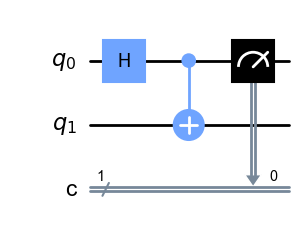

In [5]:
# 畫出量子線路圖
circuit.draw("mpl")

In [6]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# 創建一個Aer模擬器
simulator = AerSimulator()

In [7]:
# 編譯至更低階語言
compiled = transpile(circuit, simulator)

In [8]:
# 執行模擬量子電路
job = simulator.run(compiled, shots=1024)  # 跑1024次

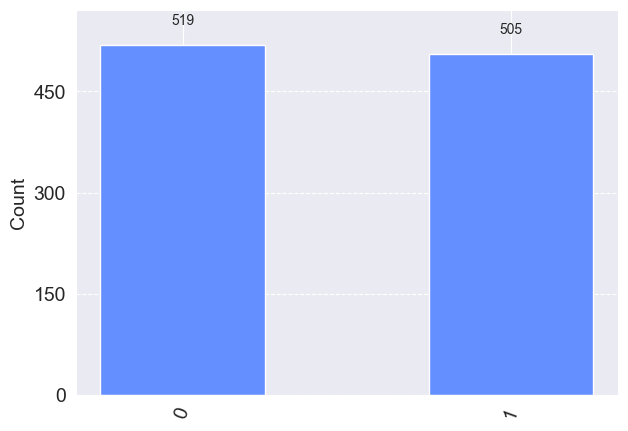

In [9]:
# 結果分析
result = job.result()  # 將記錄讀取
counts = result.get_counts(circuit)  # 輸出次數
plot_histogram(counts)  # 畫出次數直方圖